# Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
df=pd.read_csv('insurancedata.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df['_c39'].isnull()

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: _c39, Length: 1000, dtype: bool

In [5]:
df=df.drop(['_c39'], axis = 1)

In [6]:
print(df.columns,'\n')
print('total variables',len(df.columns))

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object') 

total variables 39


In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [9]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
print(df.columns,'\n')

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object') 



In [12]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

* There are no null values

In [13]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Exploratory Data Analysis

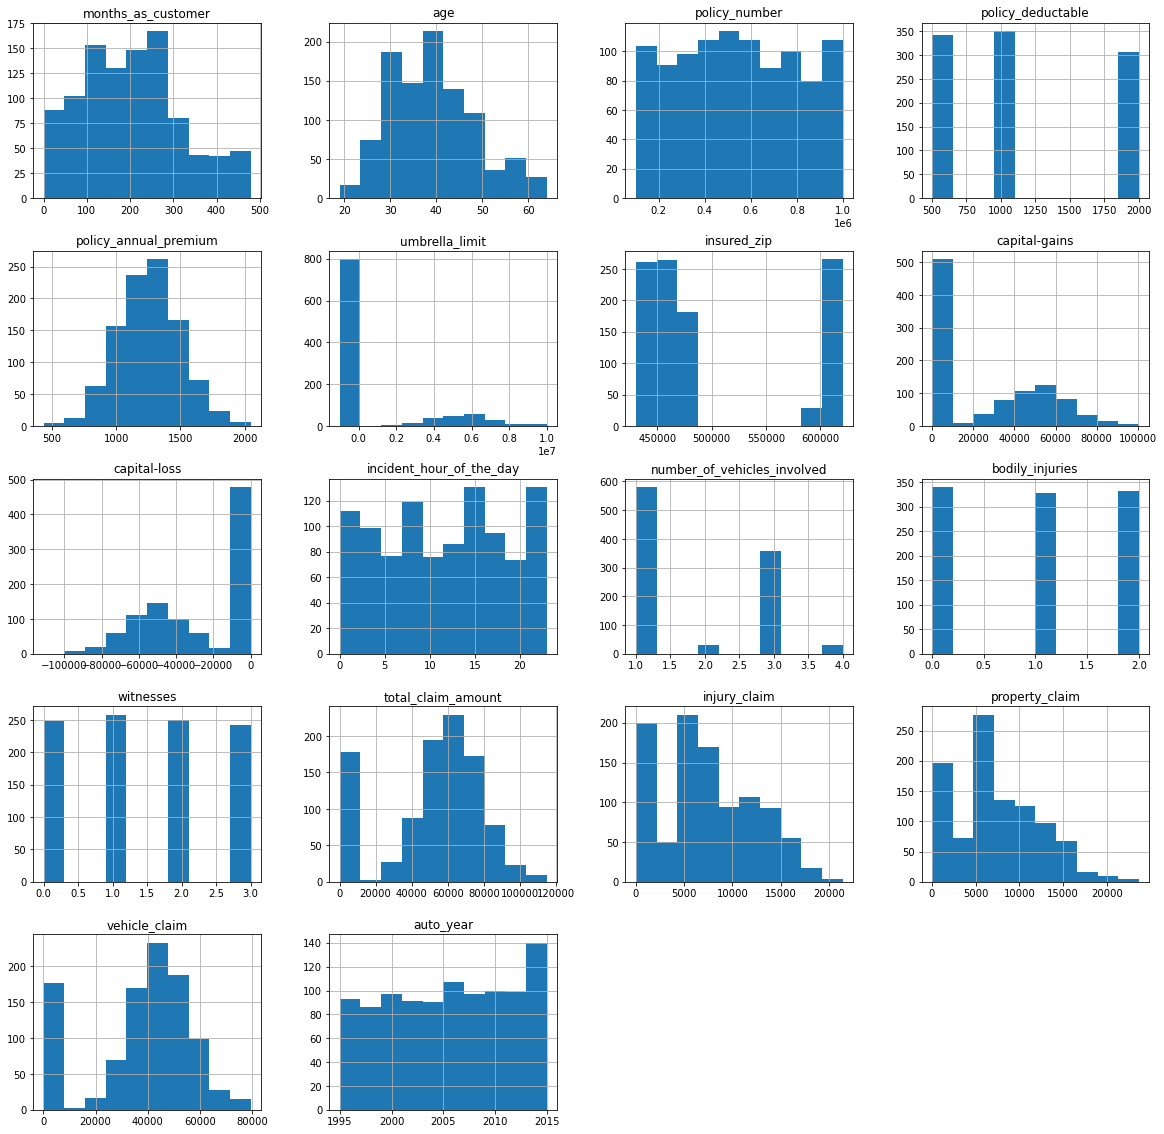

In [14]:
#multivariate analysis
df.hist(figsize=(20,20))
plt.show()

* Age of 30 and 40 is maximum of the clients

* auto_year was maximum at 2015

* vehicle claim of 40000 is the highest

* total_claim_amount is maximum in the range os 42000-60000

* injury_claim and property_claim is maximum around 5000

* maximum policy_anual premium paid is in the range of 1100-1400

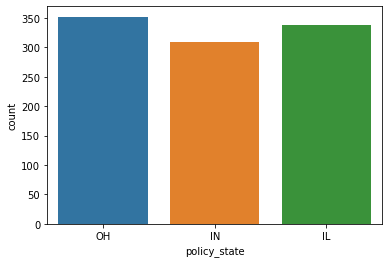

In [15]:
sns.countplot(df['policy_state'])
plt.show()

* we have a data of Ohio, Indiana, Illinois

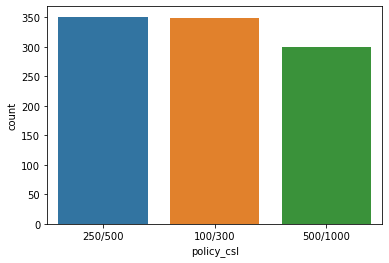

In [16]:
sns.countplot(df['policy_csl'])
plt.show()

* policy_csl 250/500, 100/300, 500/1000

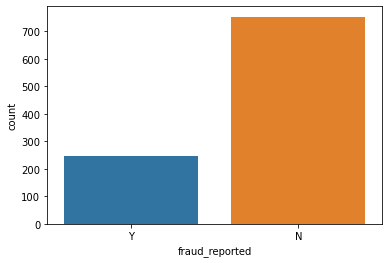

In [17]:
sns.countplot(df['fraud_reported'])
plt.show()

* Majority of the data is nun fraud report

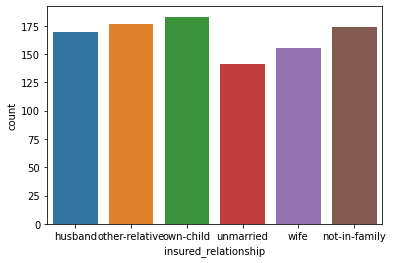

In [18]:
sns.countplot(df['insured_relationship'])
plt.show()

* insured_relationship are majority of own-child followed by other-relative and husband

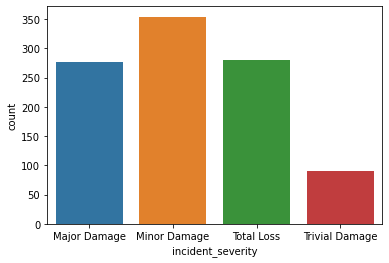

In [19]:
sns.countplot(df['incident_severity'])
plt.show()

* majority of claim were for minor damage

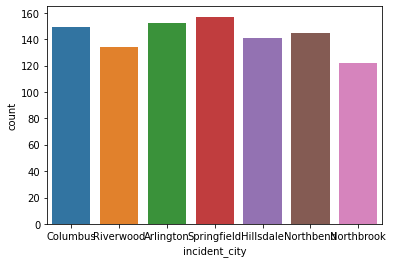

In [20]:
sns.countplot(df['incident_city'])
plt.show()

* majority of the claims were done from springfield followed by arlington

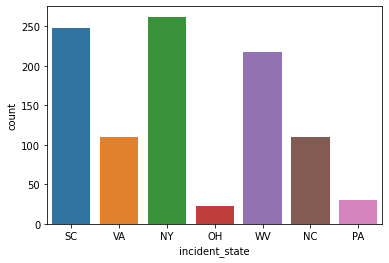

In [21]:
sns.countplot(df['incident_state'])
plt.show()

* maximum incident are filed by NY followed by SC

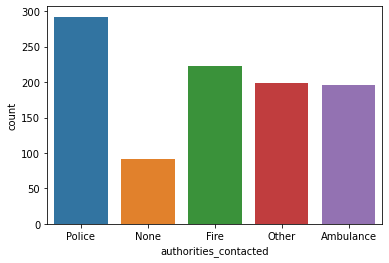

In [22]:
sns.countplot(df['authorities_contacted'])
plt.show()

* people have contacted police authority the most

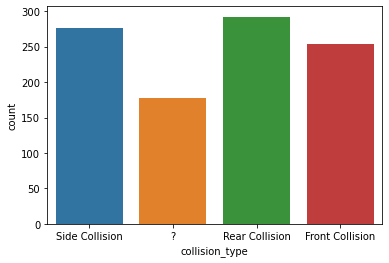

In [23]:
sns.countplot(df['collision_type'])
plt.show()

* Majority have happened Rear collision

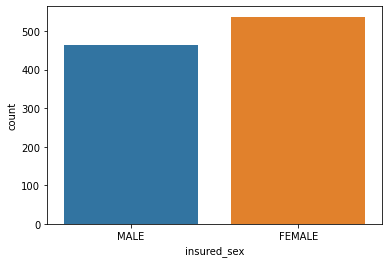

In [24]:
sns.countplot(df['insured_sex'])
plt.show()

* Majority of the customersare female

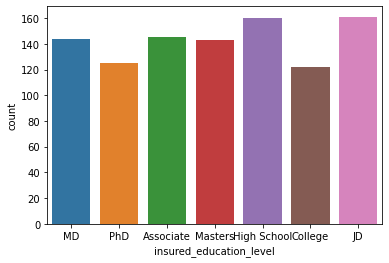

In [25]:
sns.countplot(df['insured_education_level'])
plt.show()

* Majority of the users have done High school 

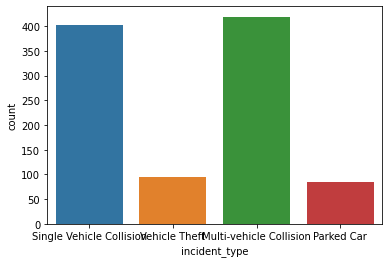

In [26]:
sns.countplot(df['incident_type'])
plt.show()

* incident_type are major of multi-vehicle collission

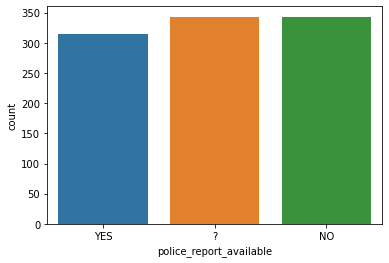

In [27]:
sns.countplot(df['police_report_available'])
plt.show()

* majority pf the police reports are not available

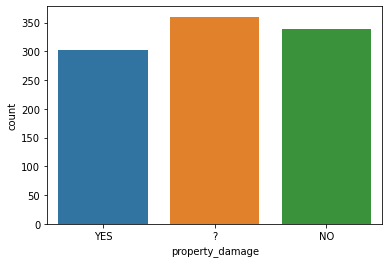

In [28]:
sns.countplot(df['property_damage'])
plt.show()

* property damane is questionable majority

<AxesSubplot:>

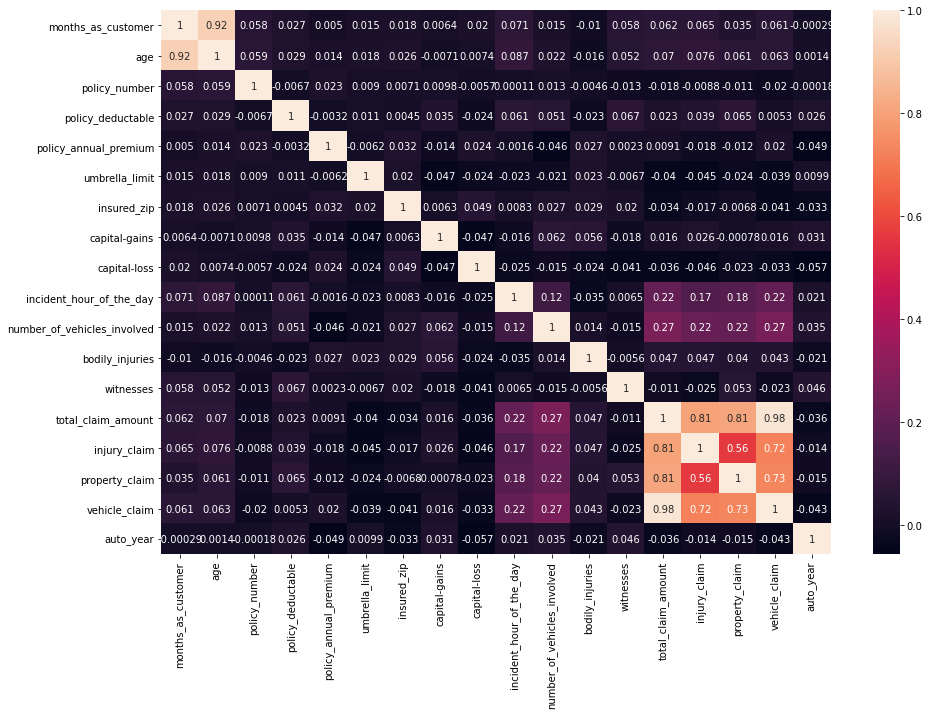

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='rocket',annot=True)

* policy_annual_premium, insured_zip, capital-loss, bodily_injuries, total_claim_amount, injury_claim,property_claim,vehicle_claim are negatively corellated

# Feature Engineering

In [30]:
df['police_report_available']=df['police_report_available'].replace(['?'],'NO')

In [31]:
df['property_damage']=df['property_damage'].replace(['?'],'NO')

In [32]:
#Removing unwanted columns
df=df.drop(['policy_bind_date','auto_model','auto_year','insured_hobbies','incident_date','collision_type','incident_location','policy_csl','umbrella_limit'], axis = 1)
df

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,521585,OH,1000,1406.91,466132,MALE,MD,craft-repair,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,228,42,342868,IN,2000,1197.22,468176,MALE,MD,machine-op-inspct,...,NO,0,0,NO,5070,780,780,3510,Mercedes,Y
2,134,29,687698,OH,2000,1413.14,430632,FEMALE,PhD,sales,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,256,41,227811,IL,2000,1415.74,608117,FEMALE,PhD,armed-forces,...,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,228,44,367455,IL,1000,1583.91,610706,MALE,Associate,sales,...,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,1000,1310.80,431289,FEMALE,Masters,craft-repair,...,YES,0,1,NO,87200,17440,8720,61040,Honda,N
996,285,41,186934,IL,1000,1436.79,608177,FEMALE,PhD,prof-specialty,...,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,N
997,130,34,918516,OH,500,1383.49,442797,FEMALE,Masters,armed-forces,...,NO,2,3,YES,67500,7500,7500,52500,Suburu,N
998,458,62,533940,IL,2000,1356.92,441714,MALE,Associate,handlers-cleaners,...,NO,0,1,YES,46980,5220,5220,36540,Audi,N


In [33]:
df.iloc[:,0:20]

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved
0,328,48,521585,OH,1000,1406.91,466132,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Major Damage,Police,SC,Columbus,5,1
1,228,42,342868,IN,2000,1197.22,468176,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Minor Damage,Police,VA,Riverwood,8,1
2,134,29,687698,OH,2000,1413.14,430632,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,7,3
3,256,41,227811,IL,2000,1415.74,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Major Damage,Police,OH,Arlington,5,1
4,228,44,367455,IL,1000,1583.91,610706,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Minor Damage,None,NY,Arlington,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,1000,1310.80,431289,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Minor Damage,Fire,NC,Northbrook,20,1
996,285,41,186934,IL,1000,1436.79,608177,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Major Damage,Fire,SC,Northbend,23,1
997,130,34,918516,OH,500,1383.49,442797,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Minor Damage,Police,NC,Arlington,4,3
998,458,62,533940,IL,2000,1356.92,441714,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Major Damage,Other,NY,Arlington,2,1


In [34]:
df.iloc[:,10:]

,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,husband,53300,0,Single Vehicle Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,other-relative,0,0,Vehicle Theft,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,Y
2,own-child,35100,0,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,unmarried,48900,-62400,Single Vehicle Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,unmarried,66000,-46000,Vehicle Theft,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unmarried,0,0,Single Vehicle Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,N
996,wife,70900,0,Single Vehicle Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,N
997,other-relative,35100,0,Multi-vehicle Collision,Minor Damage,Police,NC,Arlington,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,N
998,wife,0,0,Single Vehicle Collision,Major Damage,Other,NY,Arlington,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,N


In [35]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels 
df['policy_state']= label_encoder.fit_transform(df['policy_state'])
df['insured_sex']= label_encoder.fit_transform(df['insured_sex'])
df['police_report_available']= label_encoder.fit_transform(df['police_report_available'])
df['auto_make']= label_encoder.fit_transform(df['auto_make'])
df['property_damage']= label_encoder.fit_transform(df['property_damage'])
df['insured_education_level']= label_encoder.fit_transform(df['insured_education_level'])
df['insured_occupation']= label_encoder.fit_transform(df['insured_occupation'])
df['insured_relationship']= label_encoder.fit_transform(df['insured_relationship'])
df['incident_type']= label_encoder.fit_transform(df['incident_type'])
df['incident_severity']= label_encoder.fit_transform(df['incident_severity'])
df['authorities_contacted']= label_encoder.fit_transform(df['authorities_contacted'])
df['fraud_reported']= label_encoder.fit_transform(df['fraud_reported'])
df['incident_state']= label_encoder.fit_transform(df['incident_state'])
df['incident_city']= label_encoder.fit_transform(df['incident_city'])



df['policy_state'].unique()
df['insured_sex'].unique()
df['police_report_available'].unique()
df['auto_make'].unique()
df['property_damage'].unique()
df['insured_education_level'].unique()
df['insured_occupation'].unique()
df['insured_relationship'].unique()
df['incident_type'].unique()
df['incident_severity'].unique()
df['authorities_contacted'].unique()
df['fraud_reported'].unique()
df['incident_state'].unique()
df['incident_city'].unique()

array([1, 5, 0, 6, 2, 3, 4])

In [36]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582


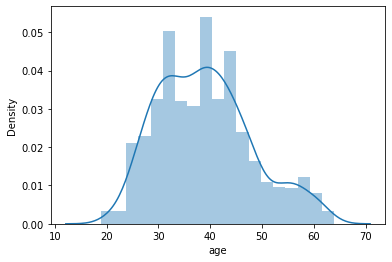

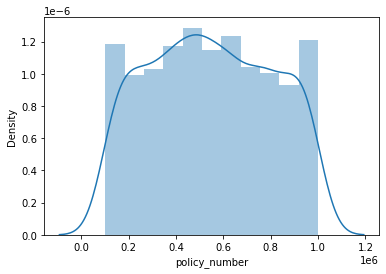

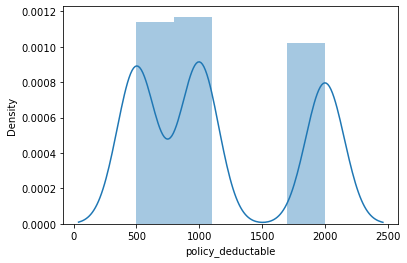

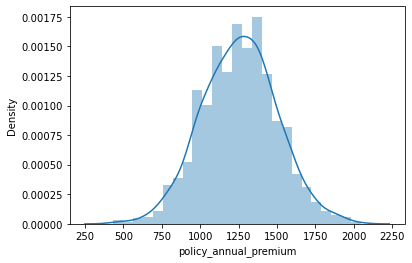

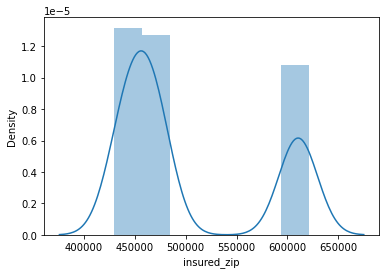

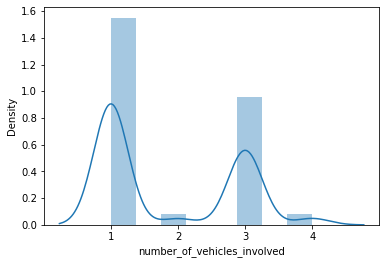

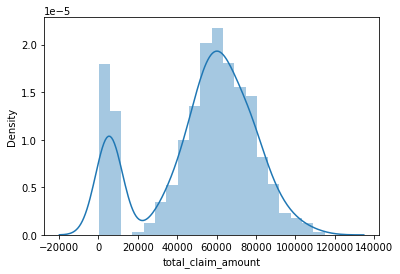

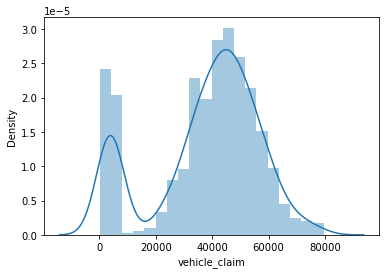

In [37]:
#Ploting skewness
for i in df.columns:
    if(df[i].all()):
        plt.figure()
        sns.distplot(df[i])

In [38]:
#Lets treat the skewness
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [39]:
#Again check skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.800369
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.438562
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -1.290274


# Building Model

In [40]:
x=df.drop(['fraud_reported'],axis=1)
x.shape

(1000, 29)

In [60]:
y=df['fraud_reported']
print(y)

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 1000, dtype: float64


In [61]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=50)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 29)
(750,)
(250, 29)
(250,)


In [63]:
#Lets chcek logistic regression
from sklearn.linear_model import LogisticRegression
#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, KFold

In [64]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['none','l2']}
cv=KFold(n_splits=15,random_state=None,shuffle=False)

In [65]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[173  18]
 [ 39  20]]
0.772
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       191
         1.0       0.53      0.34      0.41        59

    accuracy                           0.77       250
   macro avg       0.67      0.62      0.64       250
weighted avg       0.75      0.77      0.75       250



In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier_us = RandomForestClassifier()
classifier_us.fit(x_train,y_train)
y_pred=classifier_us.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[175  16]
 [ 32  27]]
0.808
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       191
         1.0       0.63      0.46      0.53        59

    accuracy                           0.81       250
   macro avg       0.74      0.69      0.70       250
weighted avg       0.79      0.81      0.80       250



In [72]:
#lets check gaussain nb
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_os,y_train_os)
y_pred=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 83 108]
 [ 10  49]]
0.528
              precision    recall  f1-score   support

         0.0       0.89      0.43      0.58       191
         1.0       0.31      0.83      0.45        59

    accuracy                           0.53       250
   macro avg       0.60      0.63      0.52       250
weighted avg       0.76      0.53      0.55       250



In [73]:
#Lets check decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_os,y_train_os)
y_pred_dt=dtc.predict(x_test)
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[152  39]
 [ 30  29]]
0.724
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       191
         1.0       0.43      0.49      0.46        59

    accuracy                           0.72       250
   macro avg       0.63      0.64      0.64       250
weighted avg       0.74      0.72      0.73       250



In [74]:
#Lets check extra tree
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_os,y_train_os)
y_pred_et=etc.predict(x_test)
print(confusion_matrix(y_test,y_pred_et))
print(accuracy_score(y_test,y_pred_et))
print(classification_report(y_test,y_pred_et))

[[181  10]
 [ 46  13]]
0.776
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       191
         1.0       0.57      0.22      0.32        59

    accuracy                           0.78       250
   macro avg       0.68      0.58      0.59       250
weighted avg       0.74      0.78      0.74       250



In [75]:
#Lets check bagging 
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train_os,y_train_os)
y_pred_bc=bc.predict(x_test)
print(confusion_matrix(y_test,y_pred_bc))
print(accuracy_score(y_test,y_pred_bc))
print(classification_report(y_test,y_pred_bc))

[[165  26]
 [ 27  32]]
0.788
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       191
         1.0       0.55      0.54      0.55        59

    accuracy                           0.79       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.79      0.79      0.79       250



In [76]:
#Let's check random forest
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(x_train_os,y_train_os)
y_pred=RFclassifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[170  21]
 [ 28  31]]
0.804
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       191
         1.0       0.60      0.53      0.56        59

    accuracy                           0.80       250
   macro avg       0.73      0.71      0.72       250
weighted avg       0.80      0.80      0.80       250



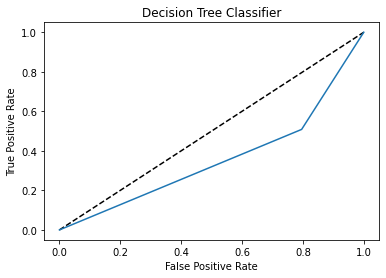

0.6436684710267104


In [77]:
#AUC_ROC Curve of random forest

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print(auc_score)

# Saving Model

In [78]:
#Saving the model
import joblib

#Save the model as a pickle in a file
joblib.dump(RFclassifier,'fraud_detection.pkl')

['fraud_detection.pkl']